## Domanda Teorica

Descrivere con proprie parole (not CHAT-GPT oriented) il concetto di time series forecasting e cosa lo differenzia dai problemi ri regressione standard, fornendo esempi ed applicazioni/limiti.

La time series forecasting si usa per fare previsioni su dati correlati al tempo. I dati sono dipendenti da quelli del periodo precedente, sono caratterizzati da una certa stagionalità, la feature e la target coincidono, la quantità di dati per il train dipende dal periodo della previsione che vogliamo fare. Nella regressione standard i dati sono indipendenti dal tempo, possono essere anche randomici come i dati sul numero di nascite, per lo split e train prendiamo una percentuale dal 20 al 30. Possiamo usare la time series ad esempio per predire le temperature o il prezzo dei biglietti aerei.

## Fake news Detection

In [1]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv
path_fake = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv'
path_true = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv'

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_fake = pd.read_csv(path_fake)
df_true = pd.read_csv(path_true)
df_fake["class"] = 0 #fake
df_true["class"] = 1 #real

df_marge = pd.concat([df_fake, df_true], axis =0 )
df = df_marge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,text,class
0,WASHINGTON (Reuters) - U.S. Democratic Senator...,1
1,BEIJING (Reuters) - China s Foreign Ministry o...,1
2,"LOL! If I was Cage s manager, I d suggest he s...",0
3,"NATIONAL HARBOR, Md. (Reuters) - A plan to blo...",1
4,Americans are 100% FED Up! with the radical ba...,0
...,...,...
44893,ANKARA (Reuters) - Turkey made a directly appe...,1
44894,WASHINGTON (Reuters) - Three Democratic lawmak...,1
44895,WASHINGTON (Reuters) - President Donald Trump’...,1
44896,"RICHMOND, Virginia (Reuters) - In a case that ...",1


In [4]:
patterns = {
            r'\d+': '',      # rimuove digits (numeri)
            r'[^\w\s]': '',  # Remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',#remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '      # rimuove tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

In [5]:
df = clean_column(df, 'text', patterns)
df

,text,class
0,washington reuters democratic senator franken ...,1
1,beijing reuters china foreign ministry wednesd...,1
2,lol was cage manager suggest shut his mouth an...,0
3,national harbor reuters plan block republican ...,1
4,americans are fed with the radical bad actors ...,0
...,...,...
44893,ankara reuters turkey made directly appeal the...,1
44894,washington reuters three democratic lawmakers ...,1
44895,washington reuters president donald trumps new...,1
44896,richmond virginia reuters case that could have...,1


In [ ]:
df['class'].value_counts()

In [6]:
text_fake = list(map(str, df[df['class']==0]['text']))
text_fake = ''.join(text_fake)

(-0.5, 799.5, 399.5, -0.5)

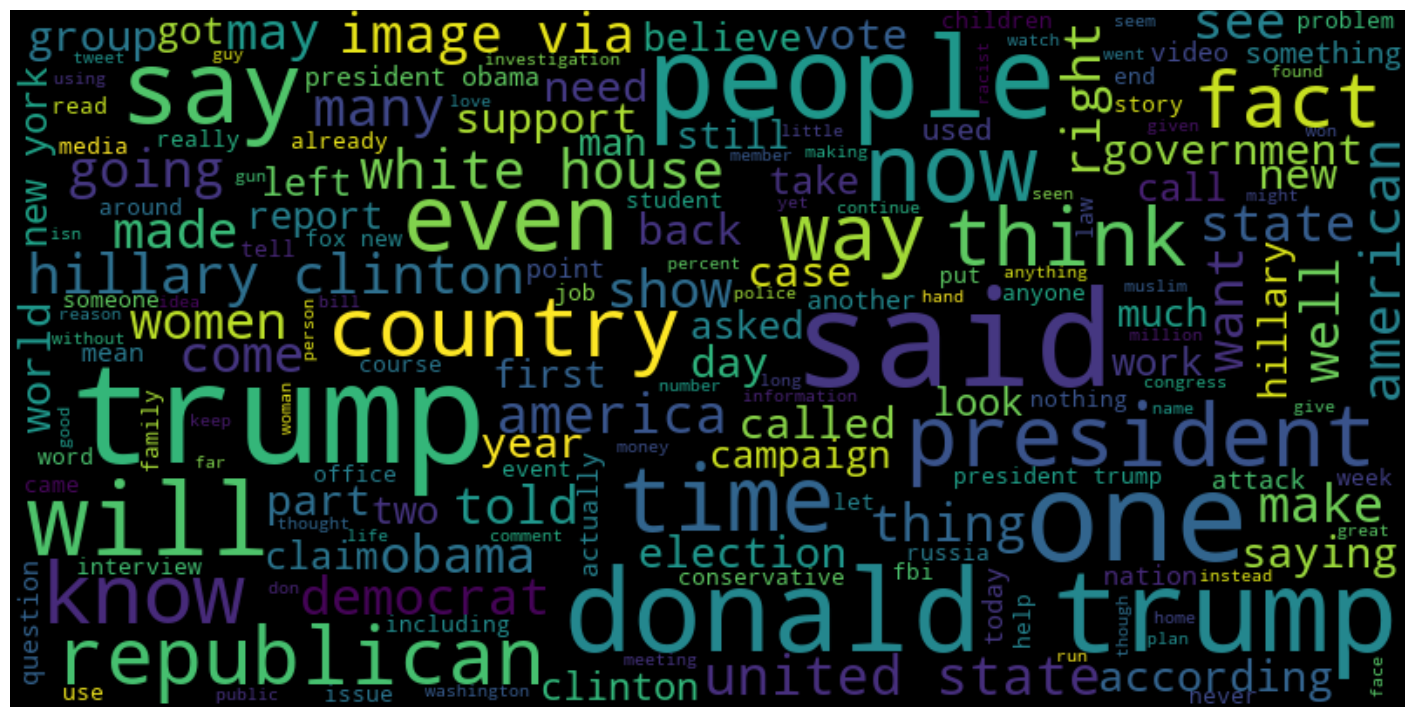

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_fake)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [8]:
text_true = list(map(str, df[df['class']==1]['text']))
text_true = ''.join(text_true)

(-0.5, 799.5, 399.5, -0.5)

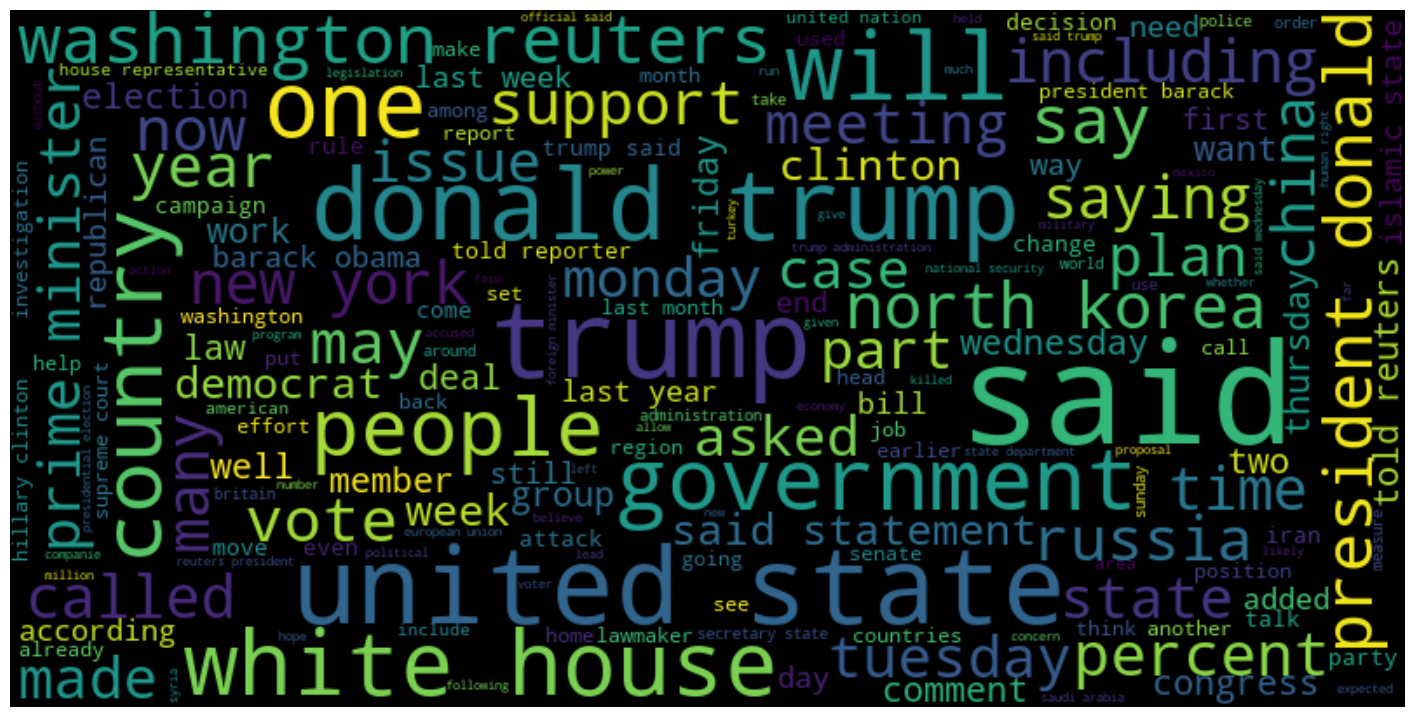

In [9]:
wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_true)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [10]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [11]:
X = df['text']
y = df['class']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=2500, min_df=5, max_df=0.7)
#vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
X_vect.shape

(44898, 2500)

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 


y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9838901262063846

In [18]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9377134372680029

In [22]:
labels = ['Fake', 'True']
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

        Fake       0.94      0.94      0.94      7026
        True       0.93      0.93      0.93      6444

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



Text(95.72222222222221, 0.5, 'Actual')

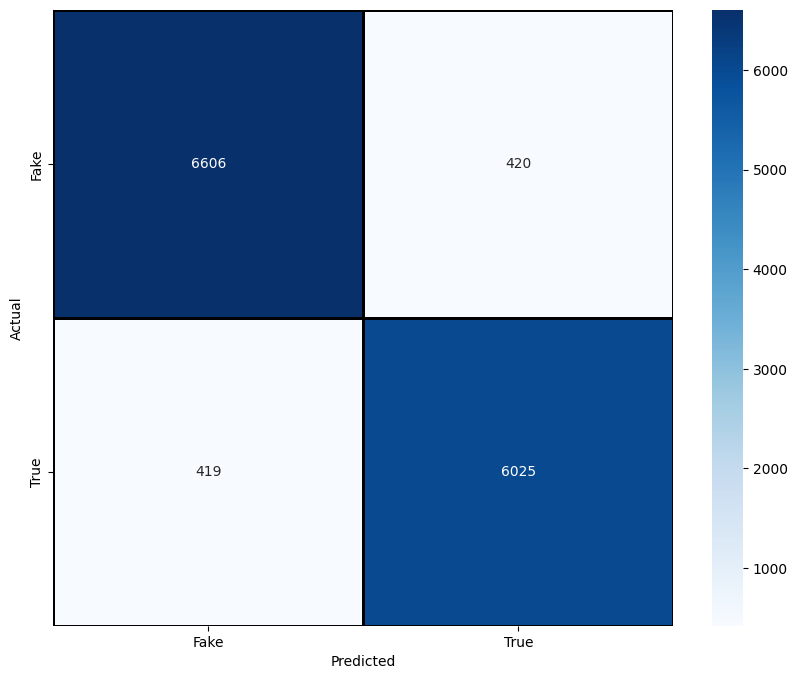

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [24]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.9569413511507052

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
#clf = classifier = MultinomialNB()

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9897550111358575


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      7026
        True       0.99      0.99      0.99      6444

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Text(95.72222222222221, 0.5, 'Actual')

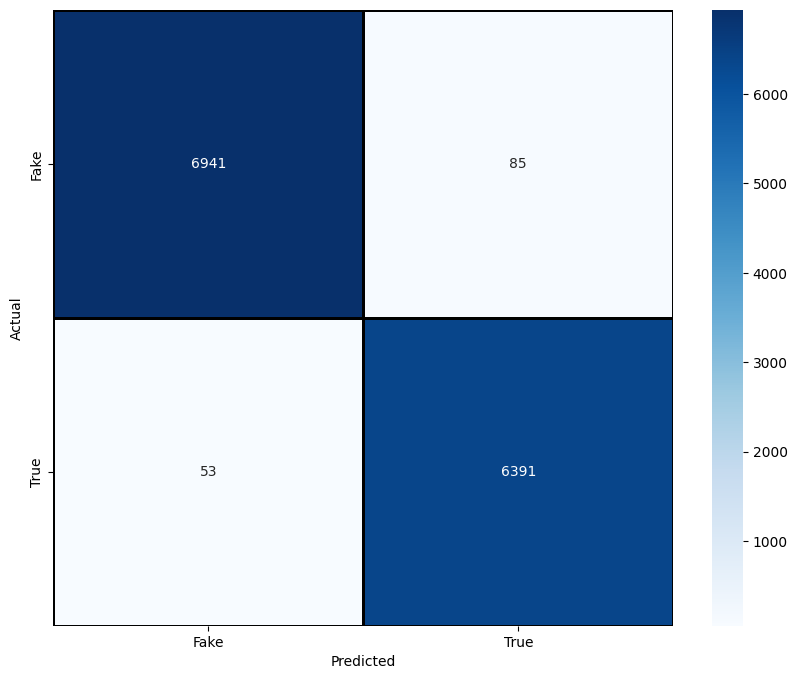

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [30]:
import numpy as np

from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.98592553 0.98432211 0.98378475 0.98039914 0.98681397 0.98788311
 0.98823949 0.97968639]
mean=0.9846318102361143
std=0.0030250599907183386


In [31]:
import joblib
joblib.dump(pipe,'fakenews.pkl')

['fakenews.pkl']

In [32]:
uploaded_model = joblib.load('fakenews.pkl')
pred = uploaded_model.predict(['Trump is very beautiful'])
pred[0]

0